In [1]:
import numpy as np
import folium 
import matplotlib.pyplot as plt
from IPython.display import display, IFrame
import os

In [2]:
def mi_lista_csv(varios_archivos):
    filtro = []
    for nombre in varios_archivos:
        if nombre[-4:] == '.csv':
            filtro.append(nombre)
    return filtro

In [15]:
def mi_mapa(archivo_mapa,ruta='./'):
    datos_mapa = np.genfromtxt(ruta+archivo_mapa,delimiter=',',dtype=float)
    t , lat_long = datos_mapa[1:,0] , datos_mapa[1:,1:3]
    mapa = folium.Map(location=lat_long[0],zoom_start=14)
    trayectoria = folium.PolyLine(locations=lat_long).add_to(mapa)
    folium.Marker(location=[lat_long[0,0],lat_long[0,1]],
                  popup="Inicio",
                  icon=folium.Icon(color='green')).add_to(mapa)
    folium.Marker(location=[lat_long[-1,0],lat_long[-1,1]],
                  popup="Final",
                  icon=folium.Icon(color='red')).add_to(mapa)
    mapa.save(ruta+archivo_mapa[:-4]+'.html')

def dist_mapa(archivo_mapa,ruta='./'):
    datos_mapa = np.genfromtxt(ruta+archivo_mapa,delimiter=',',dtype=float)
    t = datos_mapa[1:,0]
    lat, long = datos_mapa[1:,1], datos_mapa[1:,2]
    altura = datos_mapa[1:,3]
    lat , long = np.deg2rad(lat), np.deg2rad(long)
    d_acumulada = np.zeros_like(t)
    RT = 6731e3
    x = (RT + altura)*np.cos(lat)*np.sin(long)
    y = (RT + altura)*np.cos(lat)*np.cos(long)
    z = (RT + altura)*np.sin(lat)
    for i in range(len(t)-1):
        d_acumulada[i+1] = (d_acumulada[i] 
                            + np.sqrt( (x[i+1]-x[i])**2 + 
                                     (y[i+1]-y[i])**2 + 
                                     (z[i+1]-z[i])**2 )
                           )
    datos_raw= np.array([t,lat,long,altura])
    datos_xyz= np.array([x,y,z])
    return d_acumulada,datos_raw,datos_xyz

In [16]:
def deriv_sim(f,x):
    df=np.zeros_like(f)
    for i in range(1,len(x)-1):
        df[i]= (f[i+1]-f[i-1])/(x[i+1]-x[i-1])
    df[0]= (f[1]-f[0])/(x[-1]-x[0])
    return df


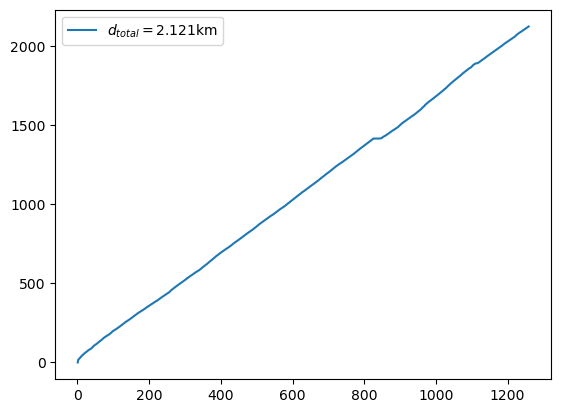

In [17]:
ruta_csv = './Archivos_csv/'
lista = os.listdir(ruta_csv)
lista = mi_lista_csv(lista)
for mapita in lista:
    mi_mapa(mapita,ruta=ruta_csv)
    mapa_html=ruta_csv+lista[0][:-4]+'.html'
    marco = IFrame(src=mapa_html,width=250,height=250)
display(marco)
d,d_r,d_xyz=dist_mapa(ruta_csv+lista[0])
plt.plot(d_r[0],d,label=r'$d_{total}=%2.3f$km' %(d[-1]/1e3))
plt.legend()
plt.show()

In [18]:
for cada_mapa in lista:
    d = dist_mapa(ruta_csv+cada_mapa)
    print('archivo: ',cada_mapa)
    print('Distancia=',d[-1]/1000,' km')

archivo:  Ubicacin GPS - Braulio Martell Saavedra.csv
Distancia= [[-6271.83351291 -6271.8367885  -6271.84779742 ... -6271.6919319
  -6271.69174594 -6271.69159205]
 [-1013.900342   -1013.8968458  -1013.8966935  ... -1014.79490597
  -1014.79432772 -1014.79372995]
 [ 2230.04563159  2230.04644374  2230.05146548 ...  2230.06611612
   2230.06762966  2230.06917688]]  km
archivo:  Raw Data - Saúl Barragán Gómez.csv
Distancia= [[-6272.70678787 -6272.68242605 -6272.67302537 ... -6272.58935339
  -6272.59125969 -6272.59162234]
 [-1013.08674036 -1013.07760915 -1013.07688396 ... -1013.57947523
  -1013.57943165 -1013.57942061]
 [ 2228.09154291  2228.08672476  2228.08647603 ...  2228.05847059
   2228.05744062  2228.0568283 ]]  km
archivo:  YoEnBici.csv
Distancia= [[-6271.26670266 -6271.26704874 -6271.26740684 ... -6272.5318457
  -6272.53018582 -6272.53033711]
 [-1010.53372037 -1010.52970427 -1010.53039982 ... -1013.77396136
  -1013.77354481 -1013.77212462]
 [ 2233.09989554  2233.09008224  2233.0887618

In [8]:
d

array([  0.        , 226.50282565, 405.57377201, ...,          nan,
                nan,          nan])

In [21]:
def rapidez(t,d):
    return derivada_sim(d,t)

In [23]:
rapidez=deriv_sim(d,d_r[0])
plt.plot(d_r[0],rap)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.